In [2]:
# import snappy
# from snappy import GPF
# from snappy import ProductIO

import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import tensorflow as tf

import sys
sys.path.append('../')
import sis_helper as helper
from sis_helper import RGBProfile as rgb

# import importlib
# importlib.reload(helper)

TILESIZE = 256

if TILESIZE == 960:
    pass
    # TIF_FILENAME='/home/cb/sis/data/collocated/001_1018x8004.tif'
    # TENSOR_FILENAME='/home/cb/sis/data/tfrecords/001_6008x9002.tfrecord'
elif TILESIZE == 256:
    TIF_FILENAME='/home/cb/sis2/data/tif256/001_2622x8886.tif'
    TENSOR_FILENAME='/home/cb/sis2/data/tfrecords256/001_2622x8886.tfrecord'

# TIF_FILENAME = '/home/cb/sis2/data/tif960/00000_1018x2016.tif'
# TIF_FILENAME = '/home/cb/sis2/data/tif960/00004_1018x2016.tif'

2023-07-05 02:24:18.296050: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-05 02:24:18.370899: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


27


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


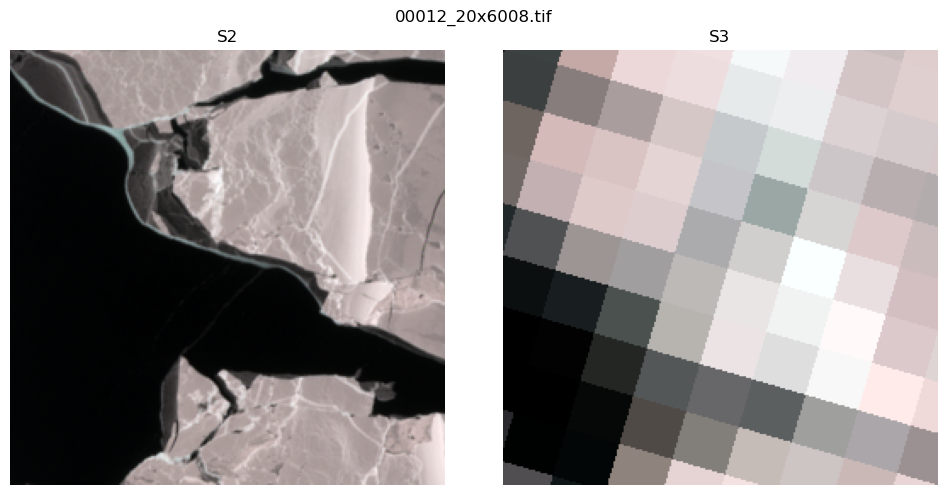

In [127]:
# raw_tiff = rasterio.open('/home/cb/sis2/data/temp4.tif')
# raw_tiff = rasterio.open('/home/cb/sis2/data/tif960/00012_1018x20.tif')
# raw_tiff = rasterio.open('/home/cb/sis2/data/tif256/00034_6798x534.tif')
raw_tiff = rasterio.open(TIF_FILENAME)
print(raw_tiff.count)
helper.plot_tiff_sbs(raw_tiff, title=TIF_FILENAME)


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


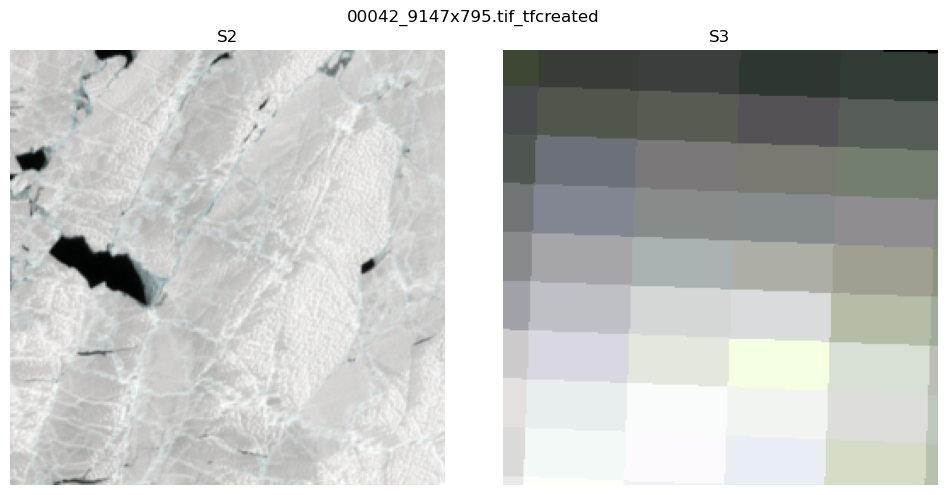

()


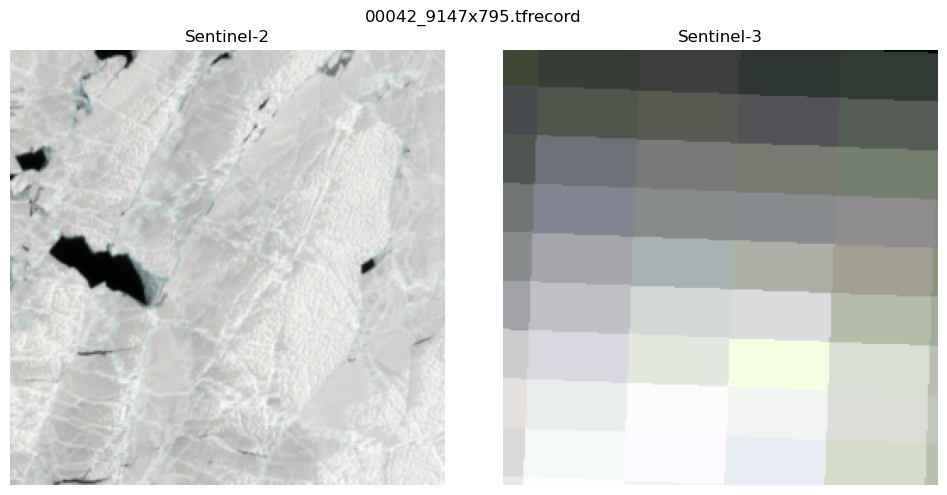

In [254]:
import random
files = os.listdir('/home/cb/sis2/data/tif256/')
TIF_FILENAME = random.choice(files)
TENSOR_FILENAME = os.path.splitext(TIF_FILENAME)[0] + '.tfrecord'
raw_tiff = rasterio.open(os.path.join('/home/cb/sis2/data/tif256/', TIF_FILENAME))
# tfrecord = rasterio.open(os.path.join('/home/cb/sis2/data/tfrecords256/', TENSOR_FILENAME))
helper.plot_tiff_sbs(raw_tiff, title=TIF_FILENAME)
sample_dataset = tf.data.TFRecordDataset(os.path.join('/home/cb/sis2/data/tfrecords256/', TENSOR_FILENAME))
for element in sample_dataset:
    print(element.shape)
    helper.plot_tensor_sbs(element, TILESIZE, title=TENSOR_FILENAME)

In [6]:
# Only uncomment if file should be produced
# helper.save_tfrecord(raw_tiff, TENSOR_FILENAME)


()


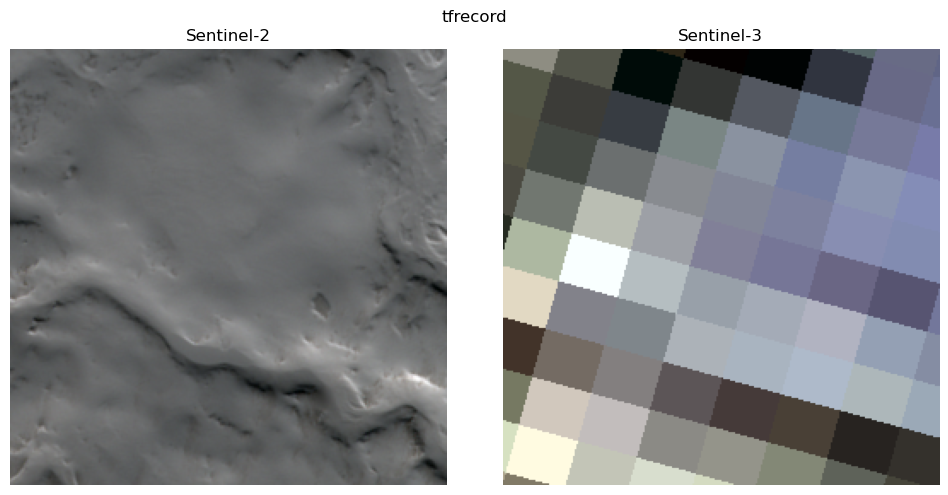

In [125]:
import importlib
importlib.reload(helper)

TENSOR_FILENAME = '/home/cb/sis2/data/tfrecords256/00005_12x3405.tfrecord'

file_list = [TENSOR_FILENAME]

for sample_file in file_list:

    sample_dataset = tf.data.TFRecordDataset(sample_file)
    for element in sample_dataset:
        print(element.shape)
        helper.plot_tensor_sbs(element, TILESIZE, title='tfrecord')


#### Additional tests

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


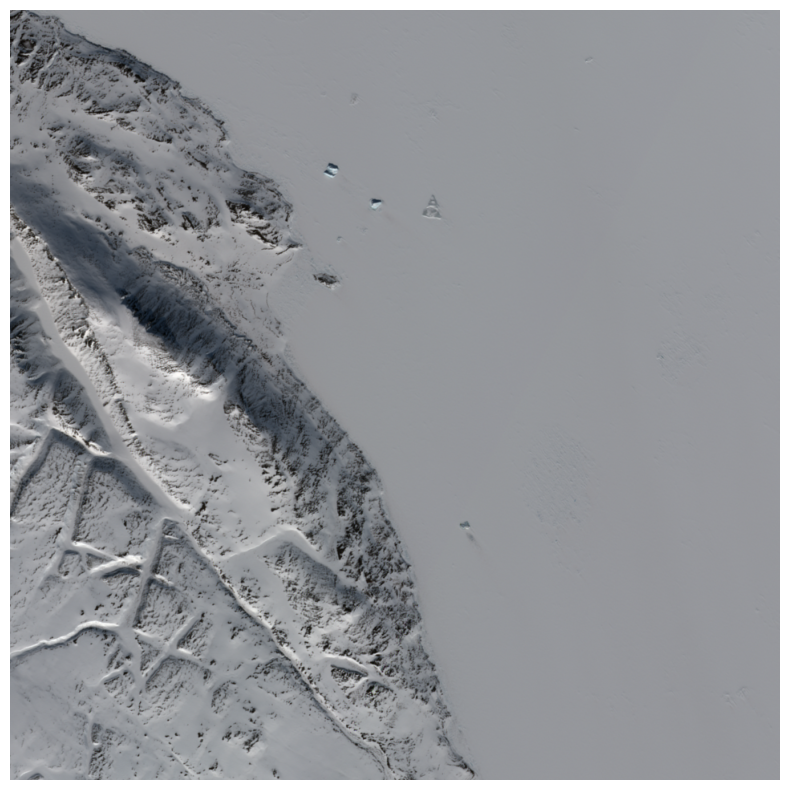

In [6]:
red_band = helper.normalize_numpy(raw_tiff.read(5))
green_band = helper.normalize_numpy(raw_tiff.read(4))
blue_band = helper.normalize_numpy(raw_tiff.read(3))

# Stack the bands to create the RGB image
# rgb_image = rasterio.plot.reshape_as_image([red_band, green_band, blue_band])
rgb_image = np.stack([red_band, green_band, blue_band], axis=-1)

# Display the RGB image
plt.figure(figsize=(10,10))
plt.imshow(rgb_image)
plt.axis('off')
plt.show()
